# Data Analysis of Candy Crush Saga dataset

[Dataset from Kaggle](https://www.kaggle.com/datasets/kingabzpro/candy-crush)

## Metrics for free to play Games  

- **[EXPLORING]** Retention rate: The percentage of players who continue to play the game over a period of time, such as one week, one month, or three months.

- **[APPLICABLE] Daily active users (DAU): The number of unique users who play the game each day. This metric measures the number of unique users who engage with a game on a daily basis. It is used to track the popularity of a game and to monitor changes in user engagement over time.**

- Average revenue per user (ARPU): The total revenue generated by the game divided by the number of active users. This metric can help to measure the effectiveness of monetization strategies, such as in-app purchases or advertising.

- **[APPLICABLE] Level completion rate: The percentage of players who successfully complete each level of the game. This metric can help to measure the difficulty of the game and identify levels that may need to be adjusted to improve the player experience.**

- Time spent in the game: The average amount of time that players spend in the game each day. This metric can help to measure engagement and identify features that are most popular among players.

- Churn rate: The percentage of players who stop playing the game over a period of time, such as one week or one month. This metric can help to identify areas where the game may be losing players and potential reasons for player attrition.

- Virality coefficient: The number of new users that are acquired through word-of-mouth or social sharing, divided by the total number of active users. This metric can help to measure the effectiveness of referral programs or social media marketing campaigns.


## Initial tasks
- install packages
- load dataset

In [2]:
# install packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import t
from matplotlib.ticker import PercentFormatter
from mizani.formatters import percent_format

from plotnine import *

from scipy.stats import sem

# import ggplot, aes, geom_line, scale_x_continuous, scale_y_continuous, ylab, ggtitle, element_text
# from plotnine.scales import percent

In [3]:
df = pd.read_csv('data/candy_crush.csv')
df.head()

,player_id,dt,level,num_attempts,num_success
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0


In [4]:
df.shape

(16865, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16865 entries, 0 to 16864
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   player_id     16865 non-null  object
 1   dt            16865 non-null  object
 2   level         16865 non-null  int64 
 3   num_attempts  16865 non-null  int64 
 4   num_success   16865 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 658.9+ KB


## First Expolorations

### Min and max date

In [6]:
min_date = df.dt.min()
max_date = df.dt.max()

print('Mim date: ', min_date)
print('Max date: ', max_date)

Mim date:  2014-01-01
Max date:  2014-01-07


In [7]:
# my_list = df['level']

unique_values = df['level'].unique()
for value in unique_values:
    count = df[df['level'] == value].shape[0]
    print(f"{value}: {count}")

4: 707
8: 2010
12: 1133
11: 1017
15: 3373
9: 1242
10: 893
14: 854
5: 1231
3: 676
6: 674
13: 690
1: 678
2: 681
7: 1006


<AxesSubplot:>

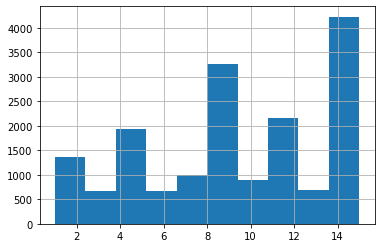

In [8]:
 df['level'].hist()

### Outliers

The number of attempts is many outliers. The number od success has too.

In [9]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols 


['level', 'num_attempts', 'num_success']

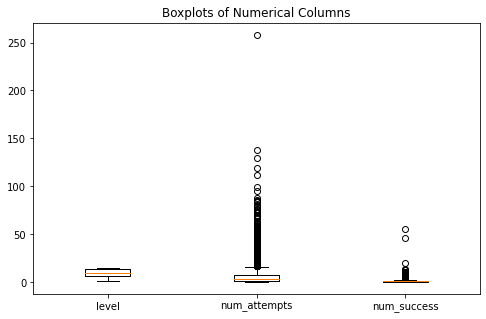

In [10]:
data = num_cols 
color=['blue']
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(df[num_cols])
ax.set_xticklabels(num_cols)
ax.set_title('Boxplots of Numerical Columns')
plt.show()


## Daily active users (DAU)

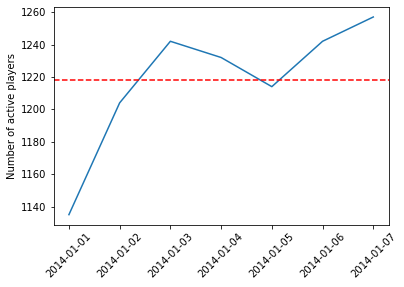

In [11]:
# Convert the 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])
# Group by 'dt' and count unique 'player_id'
unique_players_per_day = df.groupby('dt')['player_id'].nunique()
# Calculate the mean value
mean_unique_players = unique_players_per_day.mean()
# Plot the graph
fig, ax = plt.subplots()
ax.plot(unique_players_per_day.index, unique_players_per_day.values)
ax.axhline(mean_unique_players, color='r', linestyle='--')
ax.set_ylabel('Number of active players')
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.show()

In [12]:
mean_unique_players = unique_players_per_day.mean()
mean_unique_players

1218.0

In [13]:
unique_players_per_day

dt
2014-01-01    1135
2014-01-02    1204
2014-01-03    1242
2014-01-04    1232
2014-01-05    1214
2014-01-06    1242
2014-01-07    1257
Name: player_id, dtype: int64

In [14]:
# unique_players_per_day

# data = np.array([2, 5, 7, 8, 3, 6, 1, 4])data = np.array([2, 5, 7, 8, 3, 6, 1, 4])
# mean = np.mean(data)

# # Calculate differences from the mean
# diff = data - mean_unique_players

# # Create bar chart with positive and negative values
# plt.bar(np.arange(len(data))[diff>=0], diff[diff>=0], color='blue')
# plt.bar(np.arange(len(data))[diff<0], diff[diff<0], color='red')

# # Add x-axis and y-axis labels
# plt.xlabel('Data Points')
# plt.ylabel('Difference from Mean')

# # Show the plot
# plt.show()

In [15]:
def computing_column(column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]
    std_dev = df[column].std()
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard deviation: {std_dev}")
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")

column = 'level'
computing_column(column)       

Mean: 9.287222057515566
Median: 9.0
Mode: 15
Standard deviation: 4.343476812177027
Minimum value: 1
Maximum value: 15


### Users per level

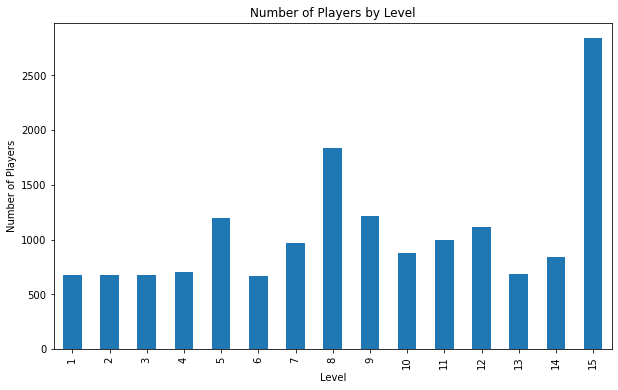

In [16]:
grouped = df.groupby('level')['player_id'].nunique()
grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Level')
plt.ylabel('Number of Players')
plt.title('Number of Players by Level')
plt.show()

In [17]:
users_per_day = df.groupby('dt')['player_id'].nunique()
print(users_per_day)


dt
2014-01-01    1135
2014-01-02    1204
2014-01-03    1242
2014-01-04    1232
2014-01-05    1214
2014-01-06    1242
2014-01-07    1257
Name: player_id, dtype: int64


### Average of users per weekends and workdays

In [18]:

# df['day_type'] = df['dt'].apply(lambda x: 'weekend' if x.weekday() in [5, 6] else 'workday')

# create a new DataFrame with the number of users per day
users_per_day_df = df.groupby('dt')['player_id'].nunique().reset_index()

# add a new column to indicate whether the day is a weekend or weekday
users_per_day_df['day_type'] = users_per_day_df['dt'].dt.day_name()
# users_per_day_df['day_type_color'] = users_per_day_df['day_type'].apply(lambda x: 'blue' if x in ['Saturday', 'Sunday'] else 'red')
# users_per_day_df
# create the plot
# plt.plot(users_per_day_df['dt'], users_per_day_df['player_id'], color=users_per_day_df['day_type_color'])
# plt.xlabel('Date')
# plt.ylabel('Number of users')
# plt.title('Number of users per day')
# plt.show()

# rename column 
users_per_day_df = users_per_day_df.rename(columns={'player_id': 'n_players'})
# users_per_day_df

# users_per_day_df['day_type_color'] = users_per_day_df.day_type.map({'Monday': 'blue','Tuesday': 'blue', 'Wednesday': 'blue', 'Thursday': 'blue', 'Friday': 'blue', 'Saturday': 'red', 'Sunday': 'red'})

users_per_day_df
# plt.scatter(x=users_per_day_df.index, y=n_players.values, c=day_type_color.values)

,dt,n_players,day_type
0,2014-01-01,1135,Wednesday
1,2014-01-02,1204,Thursday
2,2014-01-03,1242,Friday
3,2014-01-04,1232,Saturday
4,2014-01-05,1214,Sunday
5,2014-01-06,1242,Monday
6,2014-01-07,1257,Tuesday


Wednesday is the day with less active players.

In [19]:
sum_weekends = users_per_day_df.loc[(users_per_day_df['day_type'] == 'Saturday') | (users_per_day_df['day_type'] == 'Sunday')  , 'n_players'].sum()
sum_workdays =  users_per_day_df['n_players'] - sum_weekends

avg_weekends = sum_weekends/2
avg_workdays = sum_weekends/5

pct_weekends_over_weekdays = avg_weekends/avg_workdays

print('The avg of players in weekends is ', avg_weekends)
print('The avg of players in workdays is ', avg_workdays)
print('The pct of players in weekends over workdays is ', pct_weekends_over_weekdays)
# print(sum_weekends)
# print(sum_workdays)

The avg of players in weekends is  1223.0
The avg of players in workdays is  489.2
The pct of players in weekends over workdays is  2.5


## Level completion rate (LCR)
Number of players by level
> Checking if a hight difficult in level 8 results in user dropout.

Most of the players is in the last level (15) and many of them are in the level 8, the levels seem to be unbalances. However, it doesn't mean that users are not droping out and I should have more information to understand the context to guess if there is some problem in these levels.


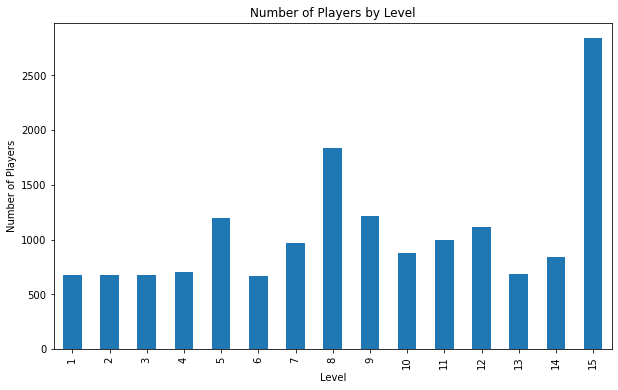

In [20]:
grouped = df.groupby('level')['player_id'].nunique()
grouped.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Level')
plt.ylabel('Number of Players')
plt.title('Number of Players by Level')
plt.show()

### Is this unbalance cousing churn?
The number of players in the next levels is significant. Apparently this doesn't seem to be a bottleneck causing players to leave. 


In [21]:
# group the data by player_id and get the maximum level reached by each player
max_level_df = df.groupby('player_id')['level'].max()
max_level_df

# count number of players with max level <= 8
num_players_level8_or_less = (max_level_df <= 8).sum()

# count number of players with max level > 8
num_players_above_level8 = (max_level_df > 8).sum()

print("Number of players with max level 8 or less:", num_players_level8_or_less)
print("Number of players with max level above 8:", num_players_above_level8)

Number of players with max level 8 or less: 2197
Number of players with max level above 8: 4617


## Levels Difficulty

### Precision of the sample mean as an estimate the population mean

The plot shows the mean number of successful attempts for each level of a task or game, along with error bars representing the standard error of the mean. The standard error of the mean is a measure of the variability in the sample means that we would expect to see if we took multiple samples from the same population.

In this case, we can't see that the mean number of successful attempts generally decreases as the level of the task or game increases. However, there is also some variability in the means, as indicated by the error bars. The larger the error bars, the greater the variability in the means for that level, suggesting that some participants may have performed better or worse than others.We also can't see variations on errors (variations in users performance).

Overall, this plot provides a useful summary of the relationship between task or game level and successful performance, along with a measure of the uncertainty or variability in the means.

**Standard error of the mean (SEM)**

```SEM = s / sqrt(n)```


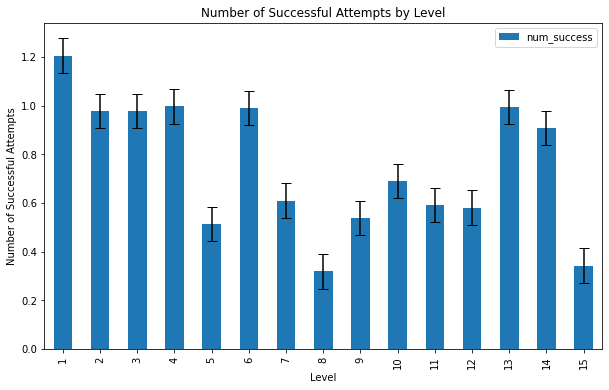

In [22]:

# Calculate the mean and standard error of the mean for each level
agg_dict = {'num_attempts': 'mean', 'num_success': 'mean'}
mean_by_level = df.groupby('level').agg(agg_dict)
sem_by_level = df.groupby('level').agg(agg_dict).apply(lambda x: sem(x, axis=0))

# Plot the mean and standard error of the mean for each level
ax = mean_by_level.plot(kind='bar', y='num_success', yerr=sem_by_level['num_success'], figsize=(10,6), capsize=5)
ax.set_xlabel('Level')
ax.set_ylabel('Number of Successful Attempts')
ax.set_title('Number of Successful Attempts by Level')
plt.show()

### Success Rate by record and over time
The success rate is more constant in the last levels.
The level 10 was shown to have a peak on 2014-01-03, it could be investigating if having more information. The success rate in level 6 is pretty inconstant.

In [23]:
df['success_rate'] = df['num_success']/df['num_attempts']
# df['success_rate'].shape
# df.info()
df

,player_id,dt,level,num_attempts,num_success,success_rate
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1,0.333333
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1,0.250000
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0,0.000000
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1,1.000000
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0,0.000000
...,...,...,...,...,...,...
16860,e3e95924b152d5d2b0fcf0cc2b8a4261,2014-01-07,15,1,1,1.000000
16861,712d953e972844194475f21b9352c1ab,2014-01-01,8,2,0,0.000000
16862,7fad6b6c0d8c8a5ef69f467511b5262c,2014-01-01,9,10,1,0.100000
16863,323676bf93f40dda0a96cba8c73c1478,2014-01-06,14,1,1,1.000000


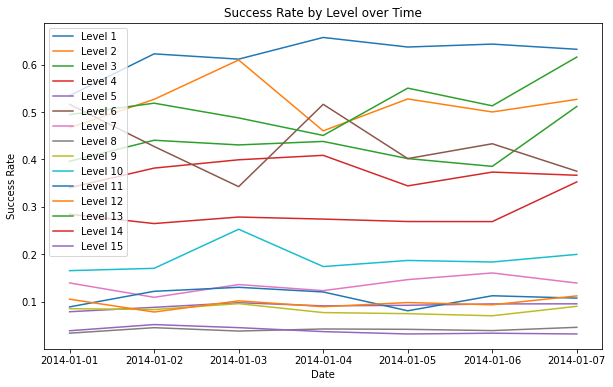

In [24]:
# convert the 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# calculate the success rate for each level and each date
success_rates = df.groupby(['level', 'dt'])['num_success'].sum() / df.groupby(['level', 'dt'])['num_attempts'].sum()

# plot the success rate for each level over time
fig, ax = plt.subplots(figsize=(10, 6))

for level in success_rates.index.levels[0]:
    ax.plot(success_rates.loc[level], label=f'Level {level}')

ax.set_xlabel('Date')
ax.set_ylabel('Success Rate')
ax.set_title('Success Rate by Level over Time')
ax.legend()

plt.show()

### Difference between number of success and mean of success per level

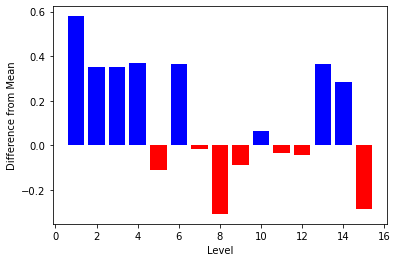

In [25]:

# Calculate mean of 'num_success' column
mean = np.mean(df['num_success'])

# Calculate differences from the mean
diff = df['num_success'] - mean

# Create new column for differences
df['diff'] = diff

# Group data by 'level' column
grouped_df = df.groupby('level')

# Calculate mean of differences for each subset
mean_diff = grouped_df['diff'].mean()

# Create bar chart with positive and negative values for each subset
plt.bar(mean_diff.index[mean_diff>=0], mean_diff[mean_diff>=0], color='blue')
plt.bar(mean_diff.index[mean_diff<0], mean_diff[mean_diff<0], color='red')

# Add x-axis and y-axis labels
plt.xlabel('Level')
plt.ylabel('Difference from Mean')

# Show the plot
plt.show()

### Probability of users winning levels

In [26]:
difficulty = df.groupby('level').agg({'num_attempts':'sum', 'num_success': 'sum'})
difficulty

,num_attempts,num_success
level,,
1,1322,818
2,1285,666
3,1546,662
4,1893,705
5,6937,634
6,1591,668
7,4526,614
8,15816,641
9,8241,670


In [27]:
difficulty['p_win'] = (difficulty['num_success']/difficulty['num_attempts'])

In [28]:
difficulty = difficulty.reset_index()

In [29]:
difficulty

,level,num_attempts,num_success,p_win
0,1,1322,818,0.618759
1,2,1285,666,0.518288
2,3,1546,662,0.428202
3,4,1893,705,0.372425
4,5,6937,634,0.091394
5,6,1591,668,0.419862
6,7,4526,614,0.135661
7,8,15816,641,0.040529
8,9,8241,670,0.081301
9,10,3282,617,0.187995


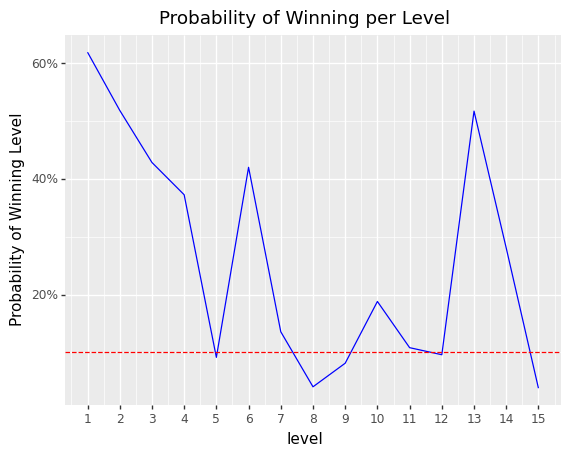

<ggplot: (8780884447979)>

In [30]:
ggplot(data=difficulty, mapping=aes(x='level', y='p_win')) + \
    geom_line(color='blue') + \
    scale_x_continuous(breaks=list(range(1, 16))) + \
    scale_y_continuous(labels=percent_format(2)) + \
    ylab("Probability of Winning Level") + \
    ggtitle("Probability of Winning per Level") + \
    theme(plot_title=element_text(hjust = 0.5)) + \
    geom_hline(yintercept=0.1, linetype='dashed', color='red')

In [23]:
# compute the probability of completing the episode without losing
p = np.prod(difficulty['p_win'])

# print out the result
print(f"The probability of completing the episode without losing a single time is {p:.12e}")

The probability of completing the episode without losing a single time is 9.447140934486e-12


In [80]:

# # create a 3D scatter plot of difficulty, time, and success rate
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['level'], df['num_attempts'], df['num_success'])

# # add labels to the plot
# ax.set_title('Difficulty Profile')
# ax.set_xlabel('Level')
# ax.set_ylabel('num_attempt')
# ax.set_zlabel('success_rate')

#### Measuring uncertanties with  standard error 

The error being measured here is the standard error of the proportion of successes **p_win** for each level. The standard error measures how much the sample mean (in this case, the proportion of successes) varies from the true population mean. The formula used to calculate the standard error of a proportion is ```sqrt(p * (1-p) / n)```, where p is the proportion of successes and n is the sample size.

In [82]:
# Compute the standard error of p_win for each level
p_win = difficulty['p_win']
attempts = difficulty['num_attempts']
error = np.sqrt(p_win * (1 - p_win) / attempts)
difficulty['error'] = error
# Print the standard error Series
difficulty.head()

,level,num_attempts,num_success,p_win,error
0,1,1322,818,0.618759,0.013358
1,2,1285,666,0.518288,0.013939
2,3,1546,662,0.428202,0.012585
3,4,1893,705,0.372425,0.011112
4,5,6937,634,0.091394,0.003460


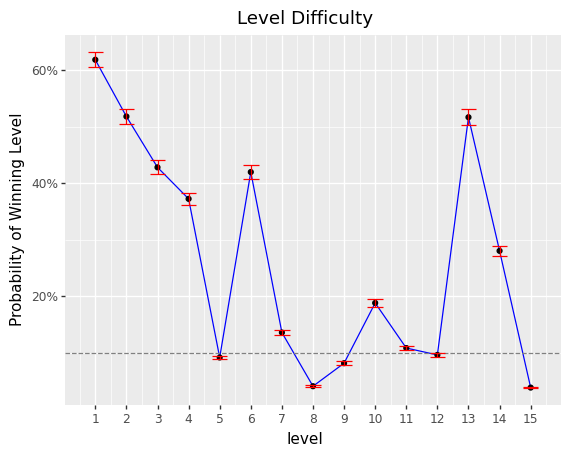

In [83]:
p = (ggplot(data=difficulty, mapping=aes(x='level', y='p_win'))
     + geom_line(color='blue')
     + scale_x_continuous(breaks=list(range(1, 16)))
     + scale_y_continuous(labels=percent_format(2))
     + ylab("Probability of Winning Level")
     + ggtitle("Level Difficulty")
     + theme(plot_title=element_text(hjust=0.5))
     + geom_point()
     + geom_hline(yintercept=0.1, linetype='dashed', color='gray')
     + geom_errorbar(aes(ymin=difficulty["p_win"] - difficulty["error"], ymax=difficulty["p_win"] + difficulty["error"]), color='red')
    )

print(p)

### Numbers of attempts vs number of successes

The scatterplot shows a relation between these variable and some outliers, it was not shown a clear correlation between them.

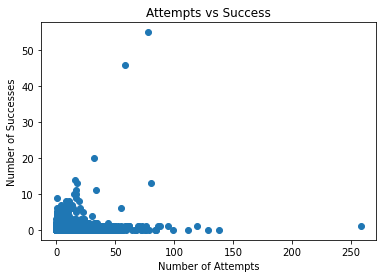

In [95]:
# Extract num_attempts and num_success columns
num_attempts = df['num_attempts']
num_success = df['num_success']

# Create scatterplot
plt.scatter(num_attempts, num_success)
plt.title('Attempts vs Success')
plt.xlabel('Number of Attempts')
plt.ylabel('Number of Successes')
plt.show()

### Number of attempts

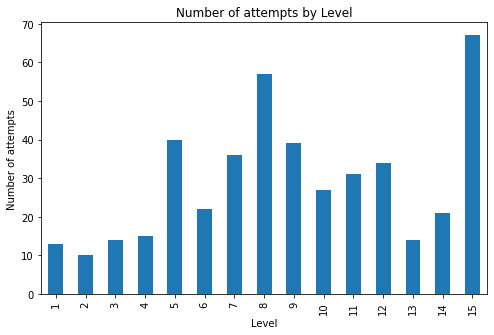

In [114]:

grouped = df.groupby('level')['num_attempts'].nunique()
grouped.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Level')
plt.ylabel('Number of attempts')
plt.title('Number of attempts by Level')
plt.show()

#### Measuring uncertanties with T-score

I compute the mean and standard deviation of **num_attempts** for each group , as well as the sample size, degrees of freedom, standard error of the mean, and confidence interval for each group. Using 95% of confidence interval for the mean of a population.

The level 11 was shows with higher uncertainty with a more spread out and less realiable values. On the other hand, the levels 2,3 and 13 were shown with lower uncertanties.

In [119]:
grouped = df.groupby('level')['num_attempts']

# compute the mean and standard deviation of each group
means = grouped.mean()
stds = grouped.std()

# compute the sample size and degrees of freedom for each group
n = grouped.size()
defree = n - 1

# compute the standard error of the mean for each group
se = stds / np.sqrt(n)

# compute the t-value for a 95% confidence interval with the given degrees of freedom
t_value = t.ppf(0.975, defree)

# compute the lower and upper bounds of the confidence interval for each group
lower = means - t_value * se
upper = means + t_value * se

# create a new DataFrame with the confidence intervals
ci_df = pd.DataFrame({'mean': means, 'lower': lower, 'upper': upper})

print(ci_df)

           mean     lower     upper
level                              
1      1.949853  1.653985  2.245720
2      1.886931  1.787973  1.985889
3      2.286982  2.145944  2.428020
4      2.677511  2.500955  2.854066
5      5.635256  5.277298  5.993214
6      2.360534  2.085478  2.635590
7      4.499006  4.155728  4.842284
8      7.868657  7.493512  8.243802
9      6.635266  6.247722  7.022809
10     3.675252  3.375218  3.975286
11     5.481809  4.883557  6.080061
12     6.061783  5.727514  6.396052
13     1.923188  1.793477  2.052900
14     3.245902  3.025371  3.466432
15     9.005040  8.678012  9.332068


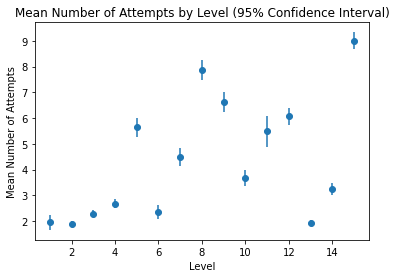

In [120]:
# plot the mean number of attempts for each level with error bars showing the confidence intervals
plt.errorbar(ci_df.index, ci_df['mean'], yerr=(ci_df['mean'] - ci_df['lower'], ci_df['upper'] - ci_df['mean']), fmt='o')

# add labels and titles
plt.xlabel('Level')
plt.ylabel('Mean Number of Attempts')
plt.title('Mean Number of Attempts by Level (95% Confidence Interval)')

# show the plot
plt.show()

### Number of success

I compute the mean and standard deviation of **num_success** for each level , as well as the sample size, degrees of freedom, standard error of the mean, and confidence interval for each level. Using 95% of confidence interval for the mean of a population.

The level 1 was shows with higher uncertainty with a more spread out and less realiable values. On the other hand, the levels 8 and 15 were shown with lower uncertanties.

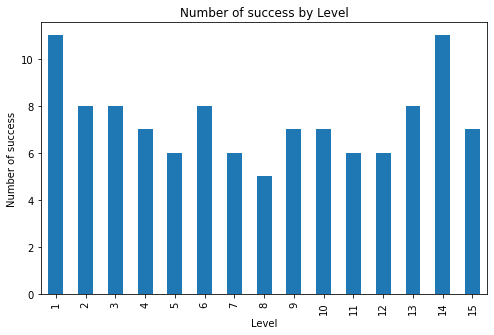

In [121]:
grouped = df.groupby('level')['num_success'].nunique()
grouped.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Level')
plt.ylabel('Number of success')
plt.title('Number of success by Level')
plt.show()

In [124]:
grouped = df.groupby('level')['num_success']

# compute the mean and standard deviation of each group
means = grouped.mean()
stds = grouped.std()

# compute the sample size and degrees of freedom for each group
n = grouped.size()
defree = n - 1

# compute the standard error of the mean for each group
se = stds / np.sqrt(n)

# compute the t-value for a 95% confidence interval with the given degrees of freedom
t_value = t.ppf(0.975, defree)

# compute the lower and upper bounds of the confidence interval for each group
lower = means - t_value * se
upper = means + t_value * se

# create a new DataFrame with the confidence intervals
ci_df = pd.DataFrame({'mean': means, 'lower': lower, 'upper': upper})

print(ci_df)

           mean     lower     upper
level                              
1      1.206490  0.995323  1.417657
2      0.977974  0.939191  1.016756
3      0.979290  0.939044  1.019536
4      0.997171  0.959476  1.034866
5      0.515028  0.478341  0.551716
6      0.991098  0.940271  1.041925
7      0.610338  0.572232  0.648444
8      0.318905  0.296383  0.341428
9      0.539452  0.505539  0.573366
10     0.690929  0.650819  0.731040
11     0.592920  0.558742  0.627099
12     0.581642  0.548692  0.614591
13     0.994203  0.940476  1.047929
14     0.909836  0.835175  0.984497
15     0.343018  0.325771  0.360266


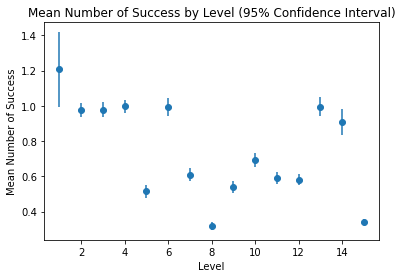

In [125]:
# plot the mean number of attempts for each level with error bars showing the confidence intervals
plt.errorbar(ci_df.index, ci_df['mean'], yerr=(ci_df['mean'] - ci_df['lower'], ci_df['upper'] - ci_df['mean']), fmt='o')

# add labels and titles
plt.xlabel('Level')
plt.ylabel('Mean Number of Success')
plt.title('Mean Number of Success by Level (95% Confidence Interval)')

# show the plot
plt.show()

### The top hardest and easiest levels

The most dificult level is the 8th, then 1st,4th and 6th. The easiest level is the 10th, followed by the 9th and 15th.
The difficulty of the 8th level seems to be an obstacle that makes players leave the game, but it could be an strategy. It's hard to say without having more context.

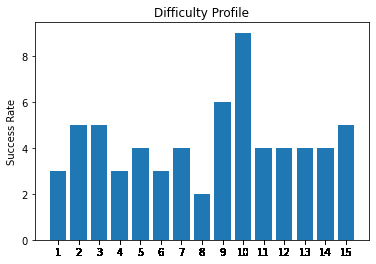

In [84]:
# sort the DataFrame by success rate in descending order
df_sorted = df.sort_values(by='success_rate', ascending=False)

# plot the data using a bar chart
plt.bar(df_sorted['level'], df_sorted['success_rate'])
plt.xticks(df_sorted['level'])
plt.ylabel('Success Rate')
plt.title('Difficulty Profile')
plt.show()

## Retention (exploratory)
Analysing number of days played, in this dataset with period of 7 days.

In [85]:

# convert the 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

# sort the DataFrame by the 'dt' column
df = df.sort_values('dt')

# group by 'dt' and count unique 'player_id' values
grouped = df.groupby('player_id')

days_played = {}

# loop over each group
for player, group in grouped:
    # count the number of unique dates in the 'dt' column
    num_days_played = group['dt'].nunique()
    # increment the count of 'player' in the 'days_played' dictionary
    days_played[num_days_played] = days_played.get(num_days_played, 0) + 1

# print the 'days_played' dictionary
print(days_played)

{1: 5103, 2: 1710, 3: 1}


In [57]:
df.head()

,player_id,dt,level,num_attempts,num_success,diff,success_rate
16864,cda5e442e086f0b9f8d19b18177e4099,2014-01-01,1,1,1,0.372843,1.0
16478,76c1e2de1c886f43f5f0db83aa07be31,2014-01-01,15,72,0,-0.627157,0.0
9765,8f50f10921be40dbfdbdb8edddf60139,2014-01-01,5,5,0,-0.627157,0.0
9953,dd198aa4e83e699b2cf29d86a329092a,2014-01-01,13,1,1,0.372843,1.0
8999,80ea2e75833ed3e83d076b600d879de5,2014-01-01,13,1,1,0.372843,1.0


In [58]:
# show matches played per some user
player_id = 'cda5e442e086f0b9f8d19b18177e4099'
rows = df[df['player_id'] == player_id]
print(rows)

                              player_id         dt  level  num_attempts   
16864  cda5e442e086f0b9f8d19b18177e4099 2014-01-01      1             1  \
2408   cda5e442e086f0b9f8d19b18177e4099 2014-01-04     15             7   
1621   cda5e442e086f0b9f8d19b18177e4099 2014-01-04     14             4   

       num_success      diff  success_rate  
16864            1  0.372843          1.00  
2408             0 -0.627157          0.00  
1621             1  0.372843          0.25  


In [59]:
# show matches played per some user
player_id = '2e38cdd9e4aac42e1b73c04a720c1da7'
rows = df[df['player_id'] == player_id]
print(rows)

                              player_id         dt  level  num_attempts   
15871  2e38cdd9e4aac42e1b73c04a720c1da7 2014-01-01     15            21  \
15193  2e38cdd9e4aac42e1b73c04a720c1da7 2014-01-01     14             2   
11226  2e38cdd9e4aac42e1b73c04a720c1da7 2014-01-01      8             2   
11865  2e38cdd9e4aac42e1b73c04a720c1da7 2014-01-01      9             7   
14527  2e38cdd9e4aac42e1b73c04a720c1da7 2014-01-01     13             3   

       num_success      diff  success_rate  
15871            0 -0.627157      0.000000  
15193            1  0.372843      0.500000  
11226            1  0.372843      0.500000  
11865            0 -0.627157      0.000000  
14527            1  0.372843      0.333333  


In [60]:
# show matches played per some user
player_id = '4dd8f6d08f64c163794b13900d1fe332'
rows = df[df['player_id'] == player_id]
print(rows)


                              player_id         dt  level  num_attempts   
13168  4dd8f6d08f64c163794b13900d1fe332 2014-01-01      2             1  \
16449  4dd8f6d08f64c163794b13900d1fe332 2014-01-01      7             3   
15830  4dd8f6d08f64c163794b13900d1fe332 2014-01-01      6             5   
13849  4dd8f6d08f64c163794b13900d1fe332 2014-01-01      3             2   
12471  4dd8f6d08f64c163794b13900d1fe332 2014-01-01      1             5   
15147  4dd8f6d08f64c163794b13900d1fe332 2014-01-01      5             3   
14486  4dd8f6d08f64c163794b13900d1fe332 2014-01-01      4             2   
14487  4dd8f6d08f64c163794b13900d1fe332 2014-01-05      8             6   

       num_success      diff  success_rate  
13168            1  0.372843      1.000000  
16449            0 -0.627157      0.000000  
15830            1  0.372843      0.200000  
13849            1  0.372843      0.500000  
12471            1  0.372843      0.200000  
15147            1  0.372843      0.333333  
14486    

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16865 entries, 16864 to 13423
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   player_id     16865 non-null  object        
 1   dt            16865 non-null  datetime64[ns]
 2   level         16865 non-null  int64         
 3   num_attempts  16865 non-null  int64         
 4   num_success   16865 non-null  int64         
 5   diff          16865 non-null  float64       
 6   success_rate  16822 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 1.0+ MB


In [62]:
# count unique values in each column
unique_counts = df.nunique()

# print the result
print(unique_counts)

player_id       6814
dt                 7
level             15
num_attempts      86
num_success       17
diff              17
success_rate     121
dtype: int64
